In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading NBA boxscore data into data frame

In [11]:
df = pd.read_csv('sports_data.csv')

In [12]:
df.head()

,G,Date,Home_Away,Team,Opp,Win_Loss,Tm_score,Opp_score,FG_for,FGA_for,...,FT_agst,FTA_agst,FTp_agst,ORB_agst,TRB_agst,AST_agst,STL_agst,BLK_agst,TOV_agst,PF_agst
0,1,10/18/22,Home,GSW,LAL,W,123,109,45,99,...,19,25,0.760,9,48,23,12,4,21,18
1,2,10/21/22,Home,GSW,DEN,L,123,128,42,88,...,21,25,0.840,12,41,30,10,2,20,22
2,3,10/23/22,Home,GSW,SAC,W,130,125,45,87,...,20,25,0.800,13,51,31,10,2,16,29
3,4,10/25/22,Away,GSW,PHO,L,105,134,41,91,...,28,34,0.824,14,48,31,8,4,13,19
4,5,10/27/22,Home,GSW,MIA,W,123,110,46,92,...,18,22,0.818,8,31,25,16,5,12,15


In [10]:
df

,G,Date,H/A,Team,Opp,WinLoss,Tm score,Opp score,FG_for,FGA_for,...,FT_agst,FTA_agst,FTp_agst,ORB_agst,TRB_agst,AST_agst,STL_agst,BLK_agst,TOV_agst,PF_agst
0,1,10/18/22,Home,GSW,LAL,W,123,109,45,99,...,19,25,0.760,9,48,23,12,4,21,18
1,2,10/21/22,Home,GSW,DEN,L,123,128,42,88,...,21,25,0.840,12,41,30,10,2,20,22
2,3,10/23/22,Home,GSW,SAC,W,130,125,45,87,...,20,25,0.800,13,51,31,10,2,16,29
3,4,10/25/22,Away,GSW,PHO,L,105,134,41,91,...,28,34,0.824,14,48,31,8,4,13,19
4,5,10/27/22,Home,GSW,MIA,W,123,110,46,92,...,18,22,0.818,8,31,25,16,5,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,78,4/2/23,Away,SAS,SAC,W,142,134,52,98,...,25,32,0.781,13,43,24,9,5,15,23
2456,79,4/4/23,Away,SAS,PHO,L,94,115,35,90,...,19,26,0.731,15,57,25,7,7,13,12
2457,80,4/6/23,Home,SAS,POR,W,129,127,47,106,...,15,18,0.833,8,36,34,7,14,15,22
2458,81,4/8/23,Home,SAS,MIN,L,131,151,50,95,...,15,21,0.714,11,45,42,8,8,7,18


In [26]:
df['Win_Loss'].value_counts()

Win_Loss
W    1230
L    1230
Name: count, dtype: int64

### Separating features columns from label column and coding binary data contained in win_loss column

In [31]:
x= df.drop(columns=['G','Date','Win_Loss','Tm_score','Opp_score'])
y=df['Win_Loss'].astype('category').cat.codes


In [34]:
x['Home_Away'] = x['Home_Away'].astype('category')
x['Team'] = x['Team'].astype('category')
x['Opp'] = x['Opp'].astype('category')

### Enumerating teams' names for inclusion as feature in machine learning model

In [33]:
dict( enumerate(x['Team'].cat.categories ) )

{0: 'ATL',
 1: 'BOS',
 2: 'BRK',
 3: 'CHI',
 4: 'CHO',
 5: 'CLE',
 6: 'DAL',
 7: 'DEN',
 8: 'DET',
 9: 'GSW',
 10: 'HOU',
 11: 'IND',
 12: 'LAC',
 13: 'LAL',
 14: 'MEM',
 15: 'MIA',
 16: 'MIL',
 17: 'MIN',
 18: 'NOP',
 19: 'NYK',
 20: 'OKC',
 21: 'ORL',
 22: 'PHI',
 23: 'PHO',
 24: 'POR',
 25: 'SAC',
 26: 'SAS',
 27: 'TOR',
 28: 'UTA',
 29: 'WAS'}

In [35]:
dict( enumerate(x['Opp'].cat.categories ) )


{0: 'ATL',
 1: 'BOS',
 2: 'BRK',
 3: 'CHI',
 4: 'CHO',
 5: 'CLE',
 6: 'DAL',
 7: 'DEN',
 8: 'DET',
 9: 'GSW',
 10: 'HOU',
 11: 'IND',
 12: 'LAC',
 13: 'LAL',
 14: 'MEM',
 15: 'MIA',
 16: 'MIL',
 17: 'MIN',
 18: 'NOP',
 19: 'NYK',
 20: 'OKC',
 21: 'ORL',
 22: 'PHI',
 23: 'PHO',
 24: 'POR',
 25: 'SAC',
 26: 'SAS',
 27: 'TOR',
 28: 'UTA',
 29: 'WAS'}

In [36]:
x['Home_Away'] = x['Home_Away'].astype('category').astype('category').cat.codes
x['Team'] = x['Team'].astype('category').astype('category').cat.codes
x['Opp'] = x['Opp'].astype('category').astype('category').cat.codes

### Splitting data for training

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=123)

In [42]:
x_train

,Home_Away,Team,Opp,FG_for,FGA_for,FG_p for,3P_for,3PA_for,3Pp_for,FT_for,...,FT_agst,FTA_agst,FTp_agst,ORB_agst,TRB_agst,AST_agst,STL_agst,BLK_agst,TOV_agst,PF_agst
104,0,25,16,43,91,0.473,12,38,0.316,15,...,20,24,0.833,17,50,34,3,2,7,15
847,0,16,14,35,94,0.372,13,50,0.260,18,...,18,23,0.783,14,56,30,5,7,7,19
710,1,2,3,39,91,0.429,17,44,0.386,21,...,16,21,0.762,8,46,15,4,2,11,16
1748,0,17,24,46,93,0.495,10,27,0.370,10,...,16,21,0.762,11,54,32,4,4,18,21
1512,1,21,29,42,100,0.420,5,27,0.185,11,...,20,25,0.800,4,53,33,4,10,26,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0,11,19,46,89,0.517,19,34,0.559,30,...,17,22,0.773,19,53,29,8,8,15,24
2154,1,18,7,41,81,0.506,11,26,0.423,28,...,16,24,0.667,9,43,24,5,5,19,22
1766,1,17,28,46,101,0.455,18,41,0.439,15,...,23,28,0.821,14,50,25,0,5,18,12
1122,1,11,23,36,85,0.424,11,39,0.282,21,...,21,24,0.875,19,53,25,13,2,15,24


### Training base logistic regression model

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/Users/pat/PycharmProjects/ML_Session_1/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
logreg.score(x_train, y_train)

1.0

### Retraining logistic regression model after scaling features

In [45]:
scaler=StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [47]:
logreg.fit(x_train_scaled, y_train)


LogisticRegression()

### Printing model accuracy

In [48]:
logreg.score(x_train_scaled, y_train)


0.9959349593495935

### Visualizing feature importance

<BarContainer object of 35 artists>

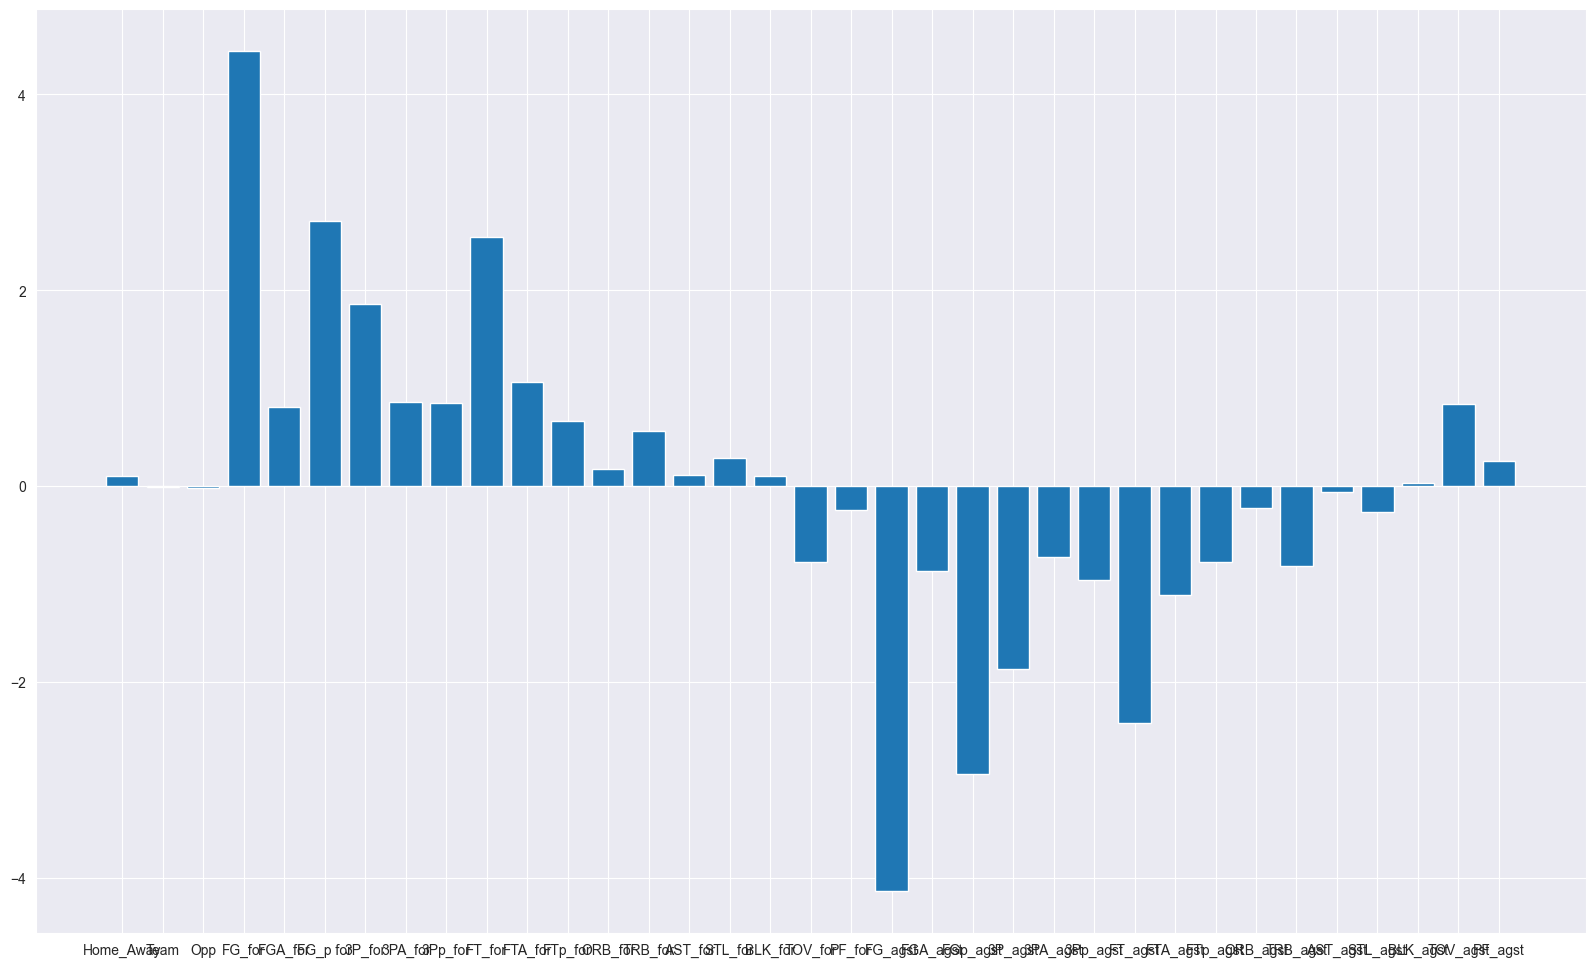

In [51]:
plt.figure(figsize=(20,12))
plt.bar(x.columns.values, logreg.coef_[0])

In [52]:
x_test_scaled = scaler.transform(x_test)

### Model Predictions Using Test Set 

In [54]:
y_pred = logreg.predict(x_test_scaled)

### Confustion Matrix Using Actual Game Results and Model Predicted Results

In [55]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[371,   2],
       [  3, 362]])

In [56]:
logreg.score(x_train_scaled, y_train)

0.9959349593495935